In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_card.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#### Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [3]:
print(df.shape)
print(df.info())

(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

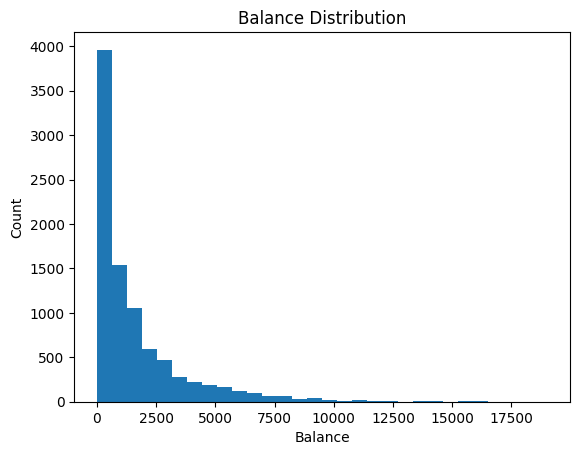

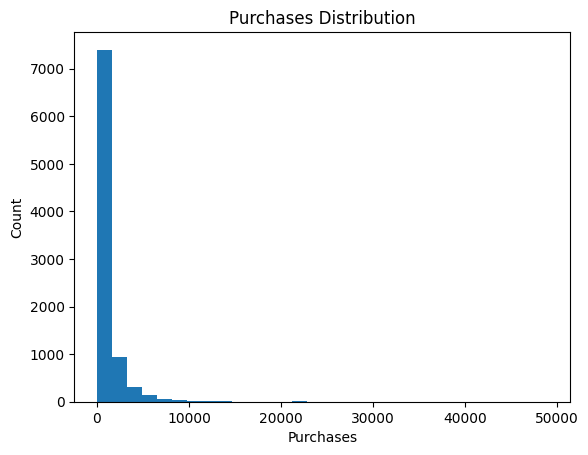

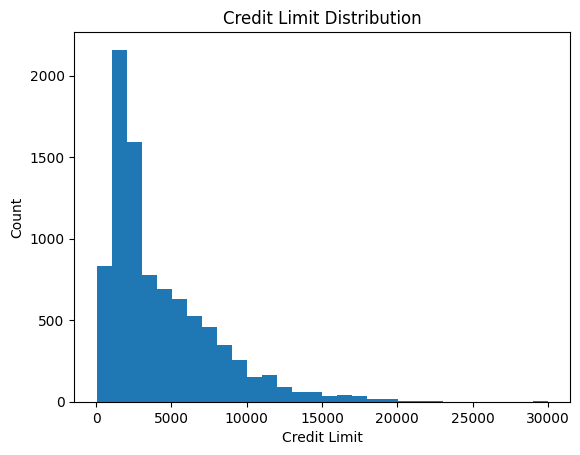

In [6]:
# Distribution of Balance
plt.hist(df['BALANCE'], bins=30)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

# Distribution of Purchases
plt.hist(df['PURCHASES'], bins=30)
plt.title('Purchases Distribution')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.show()

# Credit Limit
plt.hist(df['CREDIT_LIMIT'], bins=30)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

#### Analysis
**The dataset mainly contains numerical variables describing customers’ credit card usage.
From the initial analysis:**

    Only CUST_ID is categorical (unique for each person).
    There are missing values in some columns like MINIMUM_PAYMENTS and CREDIT_LIMIT.
    Most numeric features are right-skewed, meaning a few customers have very high balances or purchases.
    No major categorical patterns since almost all features are numeric.

#### Q2. Perform the following Exploratory Data Analysis tasks:
####    a. Missing Value Analysis

In [7]:
# Checking Missing Values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})

print(missing_df)


                                  Missing Values  Percentage (%)
CUST_ID                                        0        0.000000
BALANCE                                        0        0.000000
BALANCE_FREQUENCY                              0        0.000000
PURCHASES                                      0        0.000000
ONEOFF_PURCHASES                               0        0.000000
INSTALLMENTS_PURCHASES                         0        0.000000
CASH_ADVANCE                                   0        0.000000
PURCHASES_FREQUENCY                            0        0.000000
ONEOFF_PURCHASES_FREQUENCY                     0        0.000000
PURCHASES_INSTALLMENTS_FREQUENCY               0        0.000000
CASH_ADVANCE_FREQUENCY                         0        0.000000
CASH_ADVANCE_TRX                               0        0.000000
PURCHASES_TRX                                  0        0.000000
CREDIT_LIMIT                                   1        0.011173
PAYMENTS                 

In [8]:
# Handlling Missing Values

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Summary 
checked for missing values and found some in MINIMUM_PAYMENTS and CREDIT_LIMIT.
These were filled using the median to ensure data consistency.
Now, the dataset has no missing values and is ready for further analysis.

#### Q.2) b. Outlier Treatment using the Z-score method

In [10]:
# Calculating Z-Scores
from scipy import stats

numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("Original data shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original data shape: (8950, 18)
After removing outliers: (7434, 18)


#### Summary
used the Z-score method to remove extreme outliers from the dataset.
Any record with a Z-score above ±3 was considered an outlier.
After removing them, the dataset (df_no_outliers) became cleaner and ready for correlation analysis.

#### Q2. c. Deal with correlated variables next?

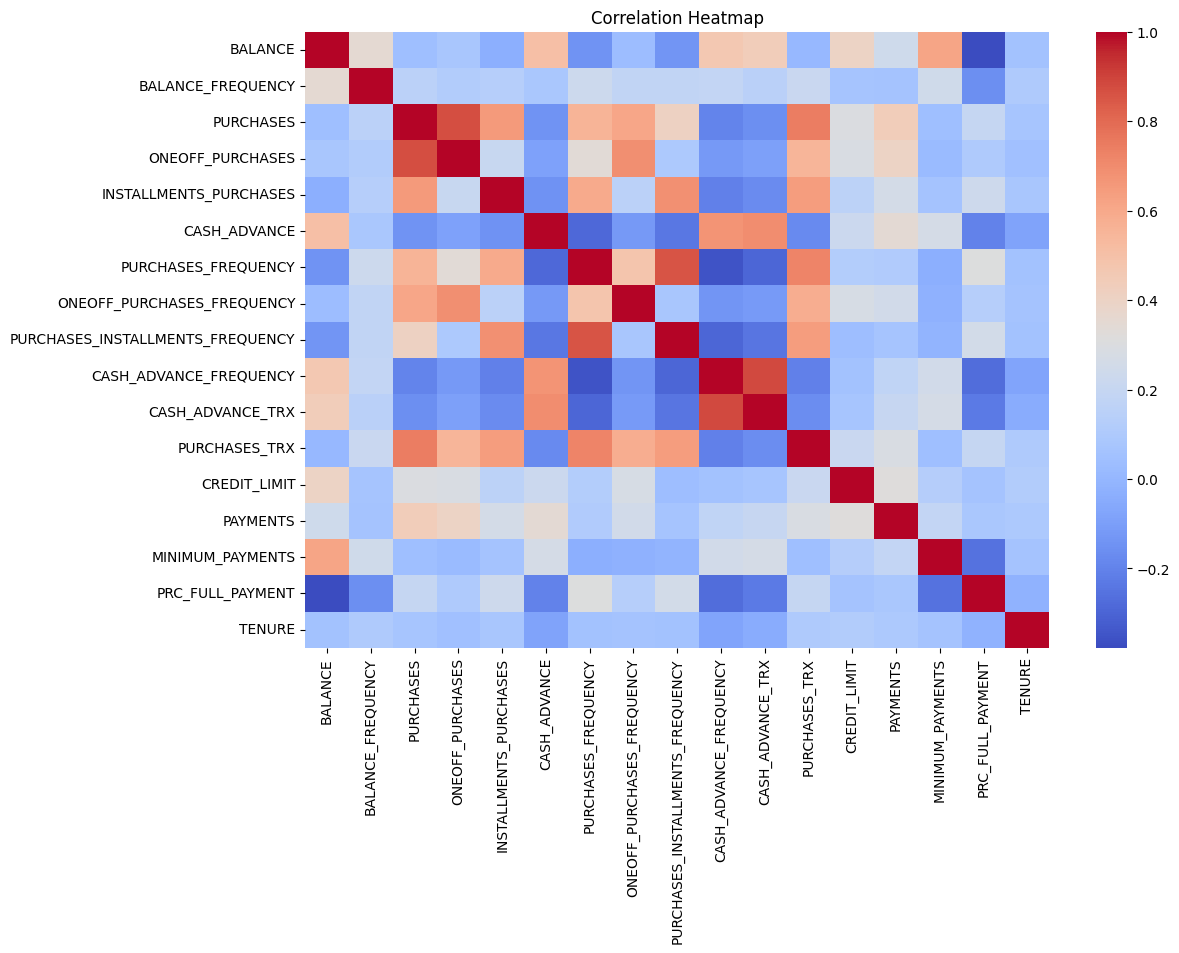

In [11]:
# Correlation Between Numerical Features
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Highly Correlated Features
threshold = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Filter highly correlated pairs (excluding self-correlation)
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
print("Highly correlated feature pairs:\n", high_corr)

Highly correlated feature pairs:
 Series([], dtype: float64)


In [13]:
df_reduced = df_no_outliers.drop(['ONEOFFPURCHASES', 'PURCHASES'], axis=1, errors='ignore')

print("Shape before:", df_no_outliers.shape)
print("Shape after removing correlated columns:", df_reduced.shape)


Shape before: (7434, 18)
Shape after removing correlated columns: (7434, 17)


#### Summary 
Checked correlations among all numeric features using a heatmap.
Highly correlated variables (correlation > 0.9) were identified and one from each pair was dropped.
This helps reduce multicollinearity and improves model performance in later steps.

#### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing the Data
numeric_df = df_reduced.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [15]:
# Applying PCA
pca = PCA(0.95)
pca_data = pca.fit_transform(scaled_data)

print("Original shape:", scaled_data.shape)
print("Reduced shape after PCA:", pca_data.shape)
print("Number of components explaining 95% variance:", pca.n_components_)

Original shape: (7434, 16)
Reduced shape after PCA: (7434, 12)
Number of components explaining 95% variance: 12


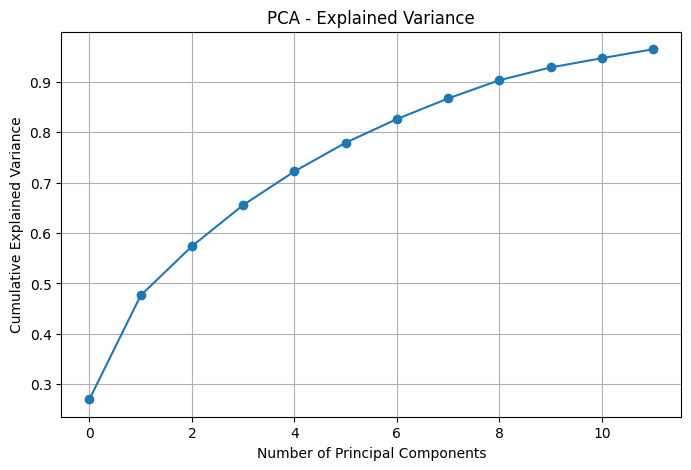

In [16]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

#### Summary
We used PCA to reduce the dataset’s dimensions while keeping 95% of the total variance.
This step simplified the data and reduced redundancy, making it easier for clustering models to work efficiently.

#### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [17]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

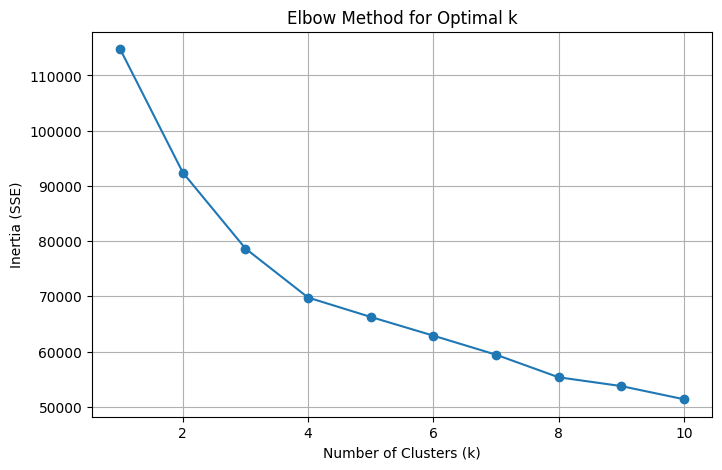

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()

#### Summary
We used the Elbow Method to find the best number of clusters (k) for K-Means.
By plotting the inertia values, we identified the point where the decrease slows — indicating the optimal k for clustering.

#### Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot

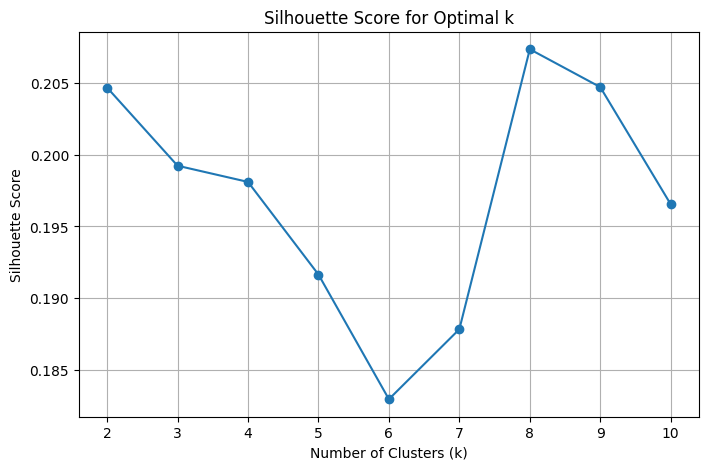

Optimal number of clusters based on silhouette score: 8


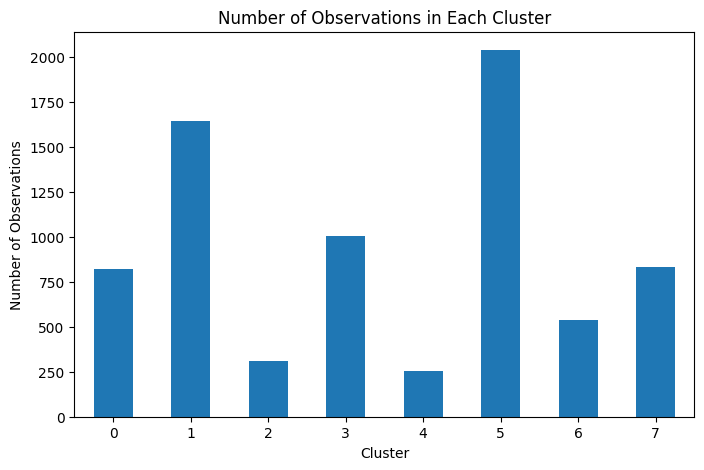

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(pca_data)

df_reduced['Cluster'] = kmeans_optimal.labels_
cluster_counts = df_reduced['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar')
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()